# 训练营——机器学习L1系列
## 机器学习
## 对蘑菇进行聚类分析

> **提示**：这样的文字将会指导你如何使用 jupyter Notebook 来完成项目。你可以通过单击代码区域，然后使用键盘快捷键 Shift+Enter 或 Shift+Return 来运行代码。或者在选择代码后使用执行（run cell）按钮执行代码。

> 在如下有**# TODO** 提示的地方，将代码补全，实现注释中所要求的功能。

> 在有"** 回答：**" 提示的地方，回答其上所提出的问题。（**Markdown的文字区域也同样可以双击然后编辑和执行**）

# 开始
在本项目中，我们将在蘑菇属性数据集上尝试运用机器学习模型Kmeans，依据数据的特征构建蘑菇分群。

我们尝试使用不断探索的方式来分析这份数据并建立机器学习模型。这个工程的结构如下：
- 初探：我们使用最简单的方式处理数据，看看模型的效果会是如何的。
- 进一步探索：我们希望在这部分更进一步，对数据进行降维处理，看看模型的效果会不会被大幅削弱。
- 展示：我们会在这一部分将聚类的效果以非常直观的方式展示出来，让大家对聚类算法有更进一步理解。

----
## 读入数据
运行下面的代码将数据读入。

In [1]:
# 导入常用库
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 读取csv文件并存储到dataframe里面
data = pd.read_csv('./mushrooms.csv')
data.head()

cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

### 观察
从蘑菇数据样本中，我们可以看到数据的一些特征：

- cap-shape: 帽型，铃形=b，锥形=c，凸=x，平面=f，旋钮=k，下陷=s
- cap-surface: 帽面，纤维=f，沟槽=g，鳞=y，光滑=s
- cap-color: 帽色，褐色=n，黄色=b，肉桂=c，灰色=g，绿色=r，粉红色=p，紫色=u，红色=e，白色=w，黄色=y  
- bruises: 瘀伤，瘀伤=t，不=f
- odor: 气味，杏仁=a，茴香=1，杂酚油=c，鱼=y，臭味=f，霉变=m，无一=n，辛辣=p，辛辣=s。 
- gill-attachment: 褶附着，附件=a，下降=d，自由=f，缺口=n
- gill-spacing: 褶间距，密=c，挤=w，远=d   
- gill-size: 褶大小，宽=b，窄=n                 
- gill-color: 褶色，黑色=k，棕色=n，黄色=b，巧克力=h，灰色=g，绿色=r，橙色=o，粉红色=p，紫色=u，红色=e，白色=w，黄色=y。
- stalk-shape: 柄形，放大=e，变细=t     
- stalk-root: 茎-根，球根=b，棍棒=c，杯=u，相等=e，根状茎=z，根=r，缺失=？        
- stalk-surface-above-ring: 环上茎表面，纤维=f，鳞=y，丝=k，光滑=s    
- stalk-surface-below-ring: 环下茎表面：纤维=f，鳞=y，丝=k，光滑=s   
- stalk-color-above-ring: 环上茎色：褐色=n，BUff=b，肉桂=c，灰色=g，橙色=o，粉红色=p，红色=e，白色=w，黄色=y      
- stalk-color-below-ring: 环下茎色：褐色=n，黄色=b，肉桂=c，灰色=g，橙色=o，粉红色=p，红色=e，白色=w，黄色=y   
- veil-type: 覆盖物型，部分=p，通用=u  
- veil-color: 覆盖物颜色，褐色=n，橙色=o，白色=w，黄色=y         
- ring-number: 环数，0=n，1=o，2=t    
- ring-type: 圆环型：cobwebby=c，式样=e，flling=f，大=l，none=n，吊坠=p，护套=s，zone=z。       
- spore-print-color: 孢子印色，黑色=k，棕色=n，黄色=b，巧克力=h，绿色=r，橙色=o，紫色=u，白色=w，黄色=y     
- population: 种群，富足=a，丛集=c，众多=n，分散=s，数=v，孤立=y                  
- habitat: 生长环境：草=g，叶=1，草甸=m，小径=p，城市=u，废物=w，森林=d 


特种中包含帽型、帽面、帽色等植物学相关的特征，我们这里并不需要研究植物学之后再对这些数据进行处理，我们先将这些特征都作为数据的不同维度属性来平等对待。

### 探索

现在就让我们来观察一下数据中每一列的数字分布情况吧！

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 23,
}

plt.figure(figsize=(30, 150))
# 将要绘制图形的每行由多少个直方图组成
column_per_line = 3
# 属性的总数
columns = len(data.columns)
lines = math.ceil(columns/column_per_line)
print("lines:", lines)
fig,axes = plt.subplots(lines,column_per_line, constrained_layout=True, figsize=(25, 50))



for i, attr in enumerate(data.columns):
    # TODO
    # 绘制columns个直方图（每个属性一个图），描绘每个属性中不同值的分布情况。直方图最好绘制成三列的排布方式，方便在如下结果窗中展示。
    # 可以使用如上定义的font字体让显示的字体更清楚些。
    row_index = int(i / column_per_line)
    column_index = int(i % column_per_line)
    print(i,row_index, column_index)
    sns.countplot(data[attr], ax=axes[row_index][column_index])

plt.show()


lines: 8
0 0 0
1 0 1
2 0 2
3 1 0
4 1 1
5 1 2
6 2 0
7 2 1
8 2 2


/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

9 3 0
10 3 1
11 3 2
12 4 0
13 4 1
14 4 2
15 5 0
16 5 1
17 5 2
18 6 0
19 6 1


/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

20 6 2
21 7 0


/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/chenchenzhong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x10800 with 0 Axes>

从结果中，可以看到，哪一列属性只有一个值，不具备区分度？

**回答：**
veil-type

In [ ]:
# TODO
# 从data中将这列没有区分度的属性去除掉


## 编码
这个案例中所有数据属性都是非数值类型的，所以我们需要对属性值进行编码处理。

我们将对仅包含2个可能值的变量使用一个简单的二进制编码，对包含3个或多个可能值的变量进行热编码。

In [12]:
from sklearn.preprocessing import LabelEncoder

# 使用sklearn中的LabelEncoder方法对仅有两个可能值的变量进行编码操作
for col in data.columns:
    # TODO
    # 判断col这列是否只有两个值，如果是，使用LabelEncoder对其进行转换并更新到data相应列中
    if len(data[col].unique()) == 2:
        label_enc = LabelEncoder()
        tr_feat1_tmp = label_enc.fit_transform(data[col]).reshape(-1, 1)
        print(col)
        data[col] = tr_feat1_tmp

        
# 打印转换之后的数据头部
data.head()

bruises
gill-attachment
gill-spacing
gill-size
stalk-shape


cap-shape cap-surface cap-color  bruises odor  gill-attachment  \
0         x           s         n        1    p                1   
1         x           s         y        1    a                1   
2         b           s         w        1    l                1   
3         x           y         w        1    p                1   
4         x           s         g        0    n                1   

   gill-spacing  gill-size gill-color  stalk-shape  ...  \
0             0          1          k            0  ...   
1             0          0          k            0  ...   
2             0          0          n            0  ...   
3             0          1          n            0  ...   
4             1          0          k            1  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                        s                      w                      w   
1                        s                      w                      w   
2                        s                      w                      w   
3                        s                      w                      w   
4                        s                      w                      w   

  veil-type veil-color ring-number ring-type spore-print-color population  \
0         p          w           o         p                 k          s   
1         p          w           o         p                 n          n   
2         p          w           o         p                 n          n   
3         p          w           o         p                 k          s   
4         p          w           o         e                 n          a   

  habitat  
0       u  
1       g  
2       m  
3       u  
4       g  

[5 rows x 22 columns]

对于多值属性，标签编码以及独热编码两个步骤，在Pandas当中，我们可以直接使用get_dummies一步完成：

In [15]:
# 使用pandas中的get_dummies方法对属性进行独热编码
data = pd.get_dummies(data)
data.head()

bruises  gill-attachment  gill-spacing  gill-size  stalk-shape  \
0        1                1             0          1            0   
1        1                1             0          0            0   
2        1                1             0          0            0   
3        1                1             0          1            0   
4        0                1             1          0            1   

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  ...  \
0            0            0            0            0            0  ...   
1            0            0            0            0            0  ...   
2            1            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 112 columns]

## 初步探索
- 我们用K-means模型来对数据进行拟合。
- 我们使用轮廓系数对模型进行评价。
- 这里我们将遍历不同的k值获取模型的最优参数。

In [17]:
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def cluster(X):
    '''
    K-Means聚类执行函数。
    
    输入
        X：待处理的数据。
    输出
        best_clusters：分数（轮廓系数）最高的分类器
        score：分类器在数据上的轮廓系数
        
    '''
    score = -1
    duration = 0
    start = time.time()
    # 取K值为2到15
    for clusters_num in range(2, 15):  
        # TODO
        # 建立kmeans模型，其中聚类数等于clusters_num
        kmeans = KMeans(n_clusters=clusters_num, random_state=10)
        
        # TODO
        # 使用kmeans模型对数据X进行拟合，并用该模型对数据X做聚类预测，存储到test_preds变量中

        test_preds = kmeans.fit_predict(X)

        # TODO
        # 使用silhouette_score计算当前模型预测所得的轮廓系数并赋值到变量test_score中
        test_score = silhouette_score(X, test_preds)
        
        # 打印计算的轮廓系数
        print("component score is ", test_score)

        #将效果最好的模型中的参数保存起来
        if (score < test_score):
            best_clustersnum = clusters_num
            score = test_score
            best_clusters=kmeans

    # 统计时间
    end = time.time()      
    duration += end - start

    # 打印结果
    print('训练模型耗时: {:.4f}s'.format(duration))
    print('当k为{}的时候，轮廓系数最高，为{:.3f}'.format(best_clustersnum, score))
    
    return best_clusters, score

# 调用cluster函数对data数据做聚类处理
clu, score = cluster(data)

component score is  0.1578442723522316
component score is  0.20502879374121666
component score is  0.21043413105310402
component score is  0.2335300576808903
component score is  0.24885156982880144
component score is  0.2511488184433959
component score is  0.2651748709412137
component score is  0.2745192145004751
component score is  0.21818132574845225
component score is  0.2360137775280186
component score is  0.18633355252869538
component score is  0.14819612444077956
component score is  0.19727602487022483
训练模型耗时: 27.4612s
当k为9的时候，轮廓系数最高，为0.275


---
## 进一步探索
### 降维处理
PCA(principal Component Analysis)，即主成分分析方法，是一种使用最广泛的数据压缩算法。

PCA将原有的数据特征进行坐标转换，生成新的特征坐标。我们可以指定PCA转换所希望得到的最终特征数来对原始数据进行这样的处理。

PCA算法可以报告出生成的每一个主成分的解释方差比（explained variance ratio）——数据中有多少方差能够用这个单独的维度来解释。

这里需要特别留意的是，PCA生成的新维度并不是将原有的某些数据维度删除所得，而是由原来数据中的特征转换而来的。

   bruises gill-attachment gill-spacing gill-size stalk-shape cap-shape_b  \
0  -0.2784          0.0042      -0.0643    0.1625     -0.0125     -0.0329   
1   0.0434          0.0100      -0.0625   -0.2370     -0.1778     -0.0122   
2  -0.1767          0.0039       0.2146   -0.0814     -0.2222      0.0480   
3  -0.1859          0.0222       0.2356   -0.0661      0.3648     -0.1056   
4   0.0282         -0.0659      -0.0233   -0.1563     -0.1662      0.0683   
5  -0.1259         -0.0882       0.0814   -0.1550     -0.1799      0.0354   
6   0.0051         -0.0683      -0.0526    0.0760     -0.0303      0.0253   
7  -0.0881         -0.1540      -0.0858   -0.0297     -0.0584     -0.0168   
8  -0.1900          0.0024       0.0840    0.2646     -0.2679      0.0046   
9  -0.0369          0.0037      -0.0275    0.0676     -0.0800      0.0138   
10  0.0459         -0.0249       0.0220   -0.0535      0.0366     -0.0899   
11  0.0776          0.0536      -0.0862    0.1080      0.0866     -0.1043   

<AxesSubplot:>

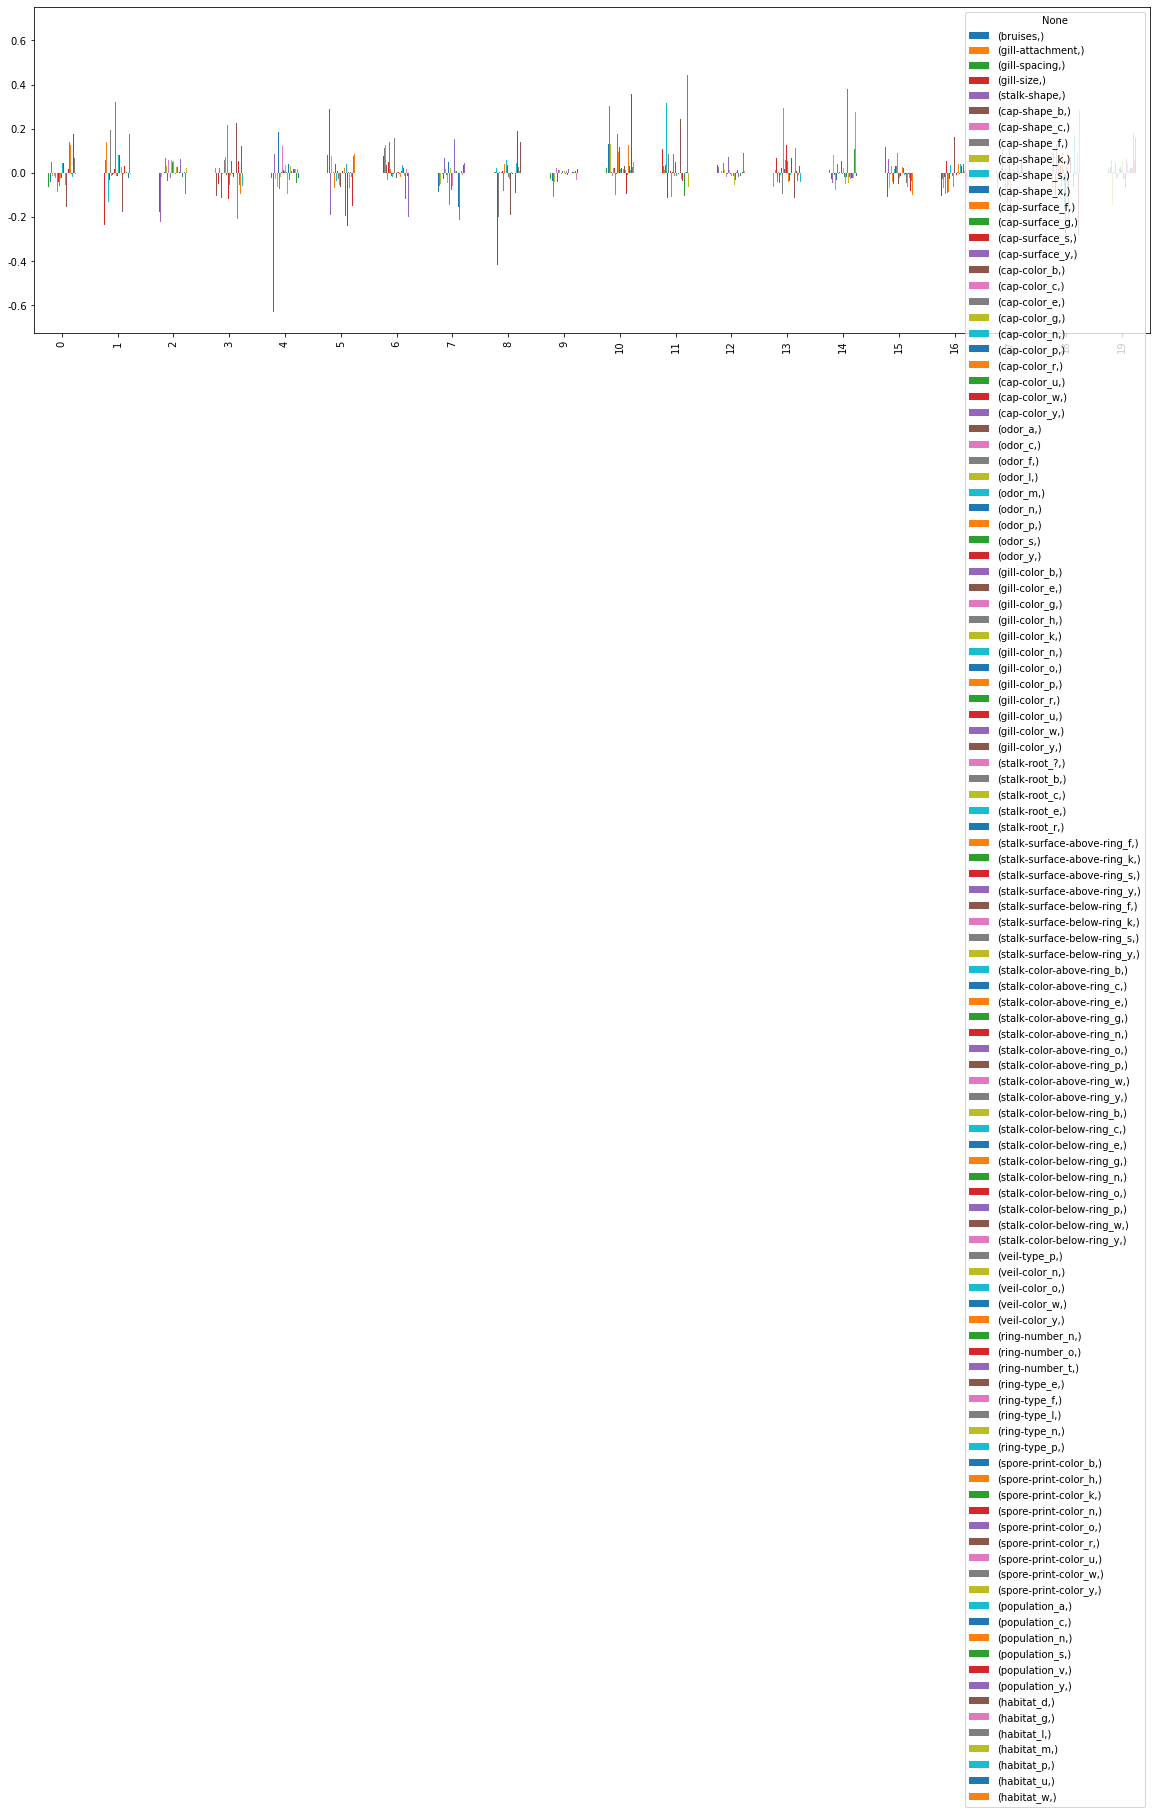

In [36]:
from sklearn.decomposition import PCA
# TODO
# 声明维度为20的PCA对象
pca = PCA(20)

# 对data进行拟合
pca.fit(data)

# pca.components_中记录了按照解释方差比从大到小排列主成分
# 使用柱形图绘制每个主成分与原数据特征之间的关系
components = pd.DataFrame(np.round(pca.components_, 4), columns = [data.keys()])
print(components)
components.plot.bar(figsize=(20, 6))


由于原数据经过独热编码处理之后，维度达到一百多，以上图形看起来并不是那么美观。不过并不影响我们理解：经过PCA转换之后返回的pca.components_表示按照方差解释比从大到小排列的数据的主成分。我们从图中看到，每个主成分都与原有的数据特征之间存在一定的关系。

我们不妨多做一点点研究，尝试绘制一下20个主成分与前两个维度（bruises、gill-attachment）之间的关系。

In [34]:
# TODO
# 使用类似如上图形绘制的方法，绘制20个主成分与前两个维度（bruises、gill-attachment）之间的关系
import seaborn as sns

sns.pairplot(components, vars=['bruises', 'gill-attachment'])


ValueError: If using all scalar values, you must pass an index

问题：从结果图中分析一下，在所以PCA的主成分（component）中，编号为多少的component与bruises的相关性最大。

注意：每个原特征与主成分的相关性具有正和负两个不同的方向，当这里看到的相关性值绝对值越大，表示原属性与主成分之间的关系越大。参考：https://onlinecourses.science.psu.edu/stat505/node/54/

**回答：**

接下来，我们计算一下pca中各主成分的方差解释比，以及pca转化之后所有的主成分所能解释的原数据的方差解释比之和。

In [26]:
# TODO
# 取出pca转换之后各主成分的方差解释比，存在变量var_ratio中
# var_ratio中的元素从大到小排列，分别表示排名最靠前一直到最靠后的方差解释比值各是多少。
new_data = pca.transform(data)

var_ratio = pca.explained_variance_ratio_

# 打印pca各component的方差解释比
print(var_ratio)

# TODO
# 打印所有方差解释比之和
print(sum(var_ratio))

[0.1619248  0.1372911  0.09241893 0.05522428 0.04015056 0.03829419
 0.03330125 0.02881923 0.02336321 0.02235018 0.02209934 0.01945614
 0.01931051 0.01704629 0.01623838 0.01592164 0.01561554 0.01507571
 0.01337727 0.01207595]
0.7993545152829375


这里我们期望做个探索，当选取最少的前多少个主成分时，方差解释比就可以达到70%以上。

In [27]:
# TODO
# 逐个计算var_ratio中的各元素之和，当至少取前多少个元素时，和大于0.7
for i in range(20):
    pca = PCA(i)

    # 对data进行拟合
    pca.fit(data)
    var_ratio = pca.explained_variance_ratio_
    print(i,sum(var_ratio))

0 0
1 0.16192479748493888
2 0.29921589732800524
3 0.39163482964588997
4 0.44685911310214005
5 0.48700962806456083
6 0.5253038518618327
7 0.5586050889939057
8 0.5874244170910572
9 0.6107871517256753
10 0.6331377473442887
11 0.6552365975691707
12 0.6746470302481913
13 0.6938083413751631
14 0.7108094836334156
15 0.7272529786529439
16 0.743135171431103
17 0.7587526416430801
18 0.7737534918129693
19 0.7872911008735867


问题：当选取最少的前多少个主成分时，方差解释比就可以达到70%以上？

**回答：** 14个主成分

按照这个成分数量定义，我们重新做下PCA转换：

In [28]:
# TODO
# 重新定义PCA变量pca，主成分数量定义为上面计算的使得解释方差比之和大于0.7的最少特征数。
pca = PCA(14)

# TODO
# 使用pca对数据data进行拟合
pca.fit(data)


PCA(n_components=14)

现在我们来看一看，降维之后模型的效果怎么样吧！

In [29]:
# 使用pca对data进行转换并重新做聚类计算
data_pca = pca.transform(data)
clu, score = cluster(data_pca)

component score is  0.22487751629995112
component score is  0.29962756474612623
component score is  0.3149136466255154
component score is  0.3451440249886513
component score is  0.3695995614736791
component score is  0.3627055659500343
component score is  0.3790186800052226
component score is  0.3330793808929183
component score is  0.29295955062244344
component score is  0.29939270892075737
component score is  0.2799745013166108
component score is  0.25882731130957076
component score is  0.2507970489698421
训练模型耗时: 23.5737s
当k为8的时候，轮廓系数最高，为0.379


问题 : 在降维后，由于维度变小节省了计算时间，模型的分数（轮廓系数）是否受到了不好的影响？

**回答：** 轮廓系数提升至0.379

---


## 聚类效果绘制
现在我们就将聚类的效果通过散点图的形式展示出来，其中，点的颜色表明它属于的簇，数字代表该簇的簇内中心点，这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的平均。

为了方便观察，我们只挑选前两个主成分作为坐标轴，绘制二维的散点图。

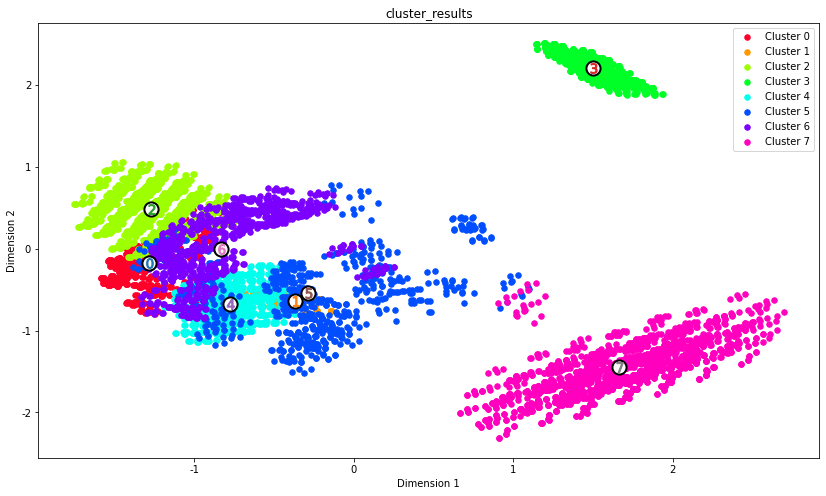

In [38]:
import visuals as vs

# 使用刚才最优化模型对data_pca数据进行预测，结果存到变量preds中
preds = clu.predict(data_pca)

# TODO
# 从聚类模型cluster中获取各聚类中心点，结果存到变量centers中
centers =  clu.cluster_centers_

# 绘制散点图
vs.cluster_results(data_pca,preds,centers)

### 揭晓
在这个案例中，我们所处理的数据其实少掉了一个列属性。任务开始之前，我们有意将它删除了。

真正完整的数据，放在文件./mushrooms_o.csv当中，让我尝试加载一下：

In [39]:
# 加载并打印mushrooms_o.csv中的数据
data_full = pd.read_csv('./mushrooms_o.csv')
data_full.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

这份数据中的class这一列，在任务开始之初被我们拿掉了。

这列其实在原始数据中，表示了蘑菇所属的分类，p表示有毒、e表示可以食用。

In [42]:
from sklearn.preprocessing import LabelEncoder 

# TODO
# 将class这列从data_full中提取出来，并用LableEncoder做编码转换，转码之后结果存在变量class_label中
label_enc = LabelEncoder()

class_label = label_enc.fit_transform(data_full['class'])

# 输出一下class_label的前3个元素
print(class_label)


[1 0 0 ... 0 1 0]


问题：通过LabelEncoder编码之后，p和e所对应的编码分别是什么？

**回答：**1 0

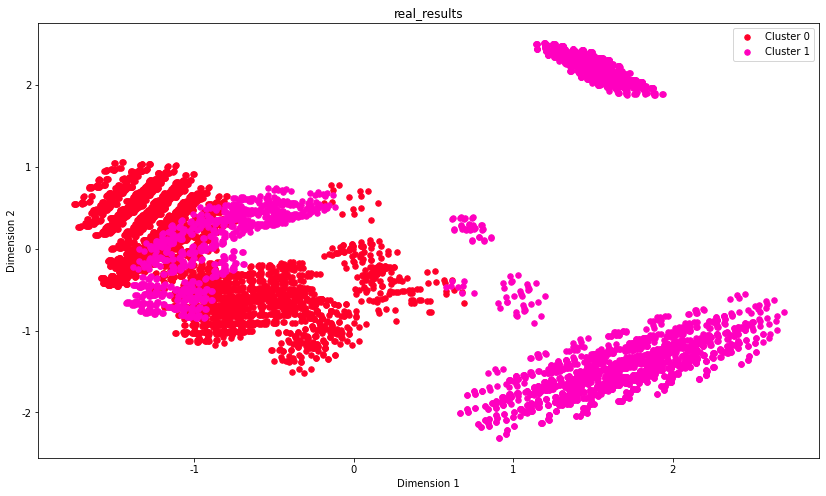

In [43]:
# 绘制原始数据在pca前两个主成分坐标系中的分类图
vs.real_results(data_pca,class_label)

虽然在建立KMeans模型之初我们并不知道数据中存在分类，但通过聚类之后，我们会发现所聚出的簇跟蘑菇是否有毒的分类存在有趣的相关性。

问题：在原始数据的有毒蘑菇中，从图中可以大致对应到我们通过KMeans聚出来的那几个簇？

**回答：**

----
小补充：

数据通过聚类算法处理获取的聚类特征，在实际项目中可以作为原有特征的一个附加特征列加入到数据中。

这样之后，将重新组合出来的数据作为监督学习（比如分类）输入数据，往往可以获取到比只使用原有特征进行计算更好的结果。

----

## 选做

在设置PCA主成分数量的时候，我们在以上操作中通过循环尝试选择了能保留70%多方差解释比的主成分数量，在最终的聚类与原始数据的分类分布上还存在一些差异。

在构建PCA对象的时候，传入的n_components参数如果值为一个小于1的小数，将表示在PCA转换中，保留多大比例的方差解释比。

在以下代码中，尝试定义一个保留百分之九十九（0.99）方差解释比的PCA，并用它对数据进行处理，最后同样绘制在前两个主成分坐标系中的散点图，对比聚类效果与原始数据的分类状况的近似情况。

In [ ]:
# TODO
# 构建保留百分之九十九方差解释比的PCA并对data进行拟合转换
# 然后使用转换之后的数据训练一个KMeans模型，并绘制数据在PCA转换之后在前两个主成分坐标上的聚类分布散点图
